In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt, cm as cmap

In [2]:
### Constants
AIR_DENSITY     = 1.225         * 1e0   # kg/m**3
AIR_VISCOSITY   = 1.7894e-5     * 1e0   # kg/m/s  or Pa*s (Dynamic)


In [3]:
### Config
MEAN_CHORD      = 300           * 1e-3  # mm
WINGSPAN        = 1200          * 1e-3  # mm
ASPECT_RATIO    = WINGSPAN/MEAN_CHORD


In [69]:
alpha,reynolds,cl,cd,cm = np.load("tkv2008_analysis_3_smooth.npy",allow_pickle=True)
cl = cl[:,5]
cd = cd[:,5]

In [43]:
velocity = AIR_VISCOSITY * reynolds / AIR_DENSITY / MEAN_CHORD

In [44]:
idrag = 0.035
efficiency = 1/(1+idrag)

In [48]:
efficiency

0.9661835748792271

In [65]:
alpha_zero = np.argmin(np.abs(cl))
cl_prime = cl[1:]-cl[:-1]
CL = np.zeros(cl.shape)
a0 = np.insert(cl_prime,alpha_zero,0)
# a = a0/np.sqrt(1+(a0/np.pi/ASPECT_RATIO)**2+(a0/np.pi/ASPECT_RATIO))
a = a0/(1+(a0*180/np.pi/(np.pi*ASPECT_RATIO*efficiency)))
for alph_forward in range(alpha_zero+1,cl.shape[0]):
    CL[alph_forward] = CL[alph_forward-1] + a[alph_forward]
for alph_backward in range(alpha_zero-1,-1,-1):
    CL[alph_backward] = CL[alph_backward+1] - a[alph_backward]

In [70]:
CD = cd + CL**2/np.pi/efficiency/ASPECT_RATIO

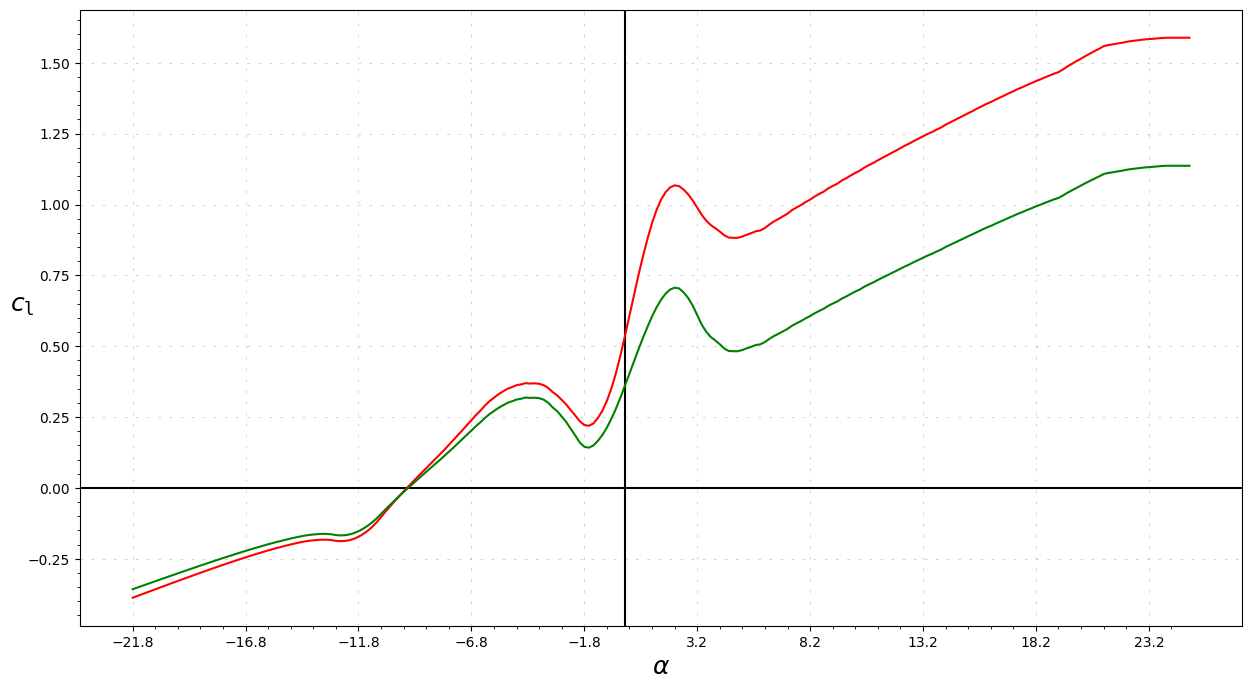

In [67]:
## plot
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}
current_cm = colormap['None']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
ax.set_yticks(np.arange(-0.5,3,0.25))
ax.set_xticks(alpha[0::5],minor=True)
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_xticks(alpha[0::25])
ax.set_facecolor(current_cm['ax_facecolor'])
ax.plot(alpha,cl[:],color='red')
ax.plot(alpha,CL[:],color='green')

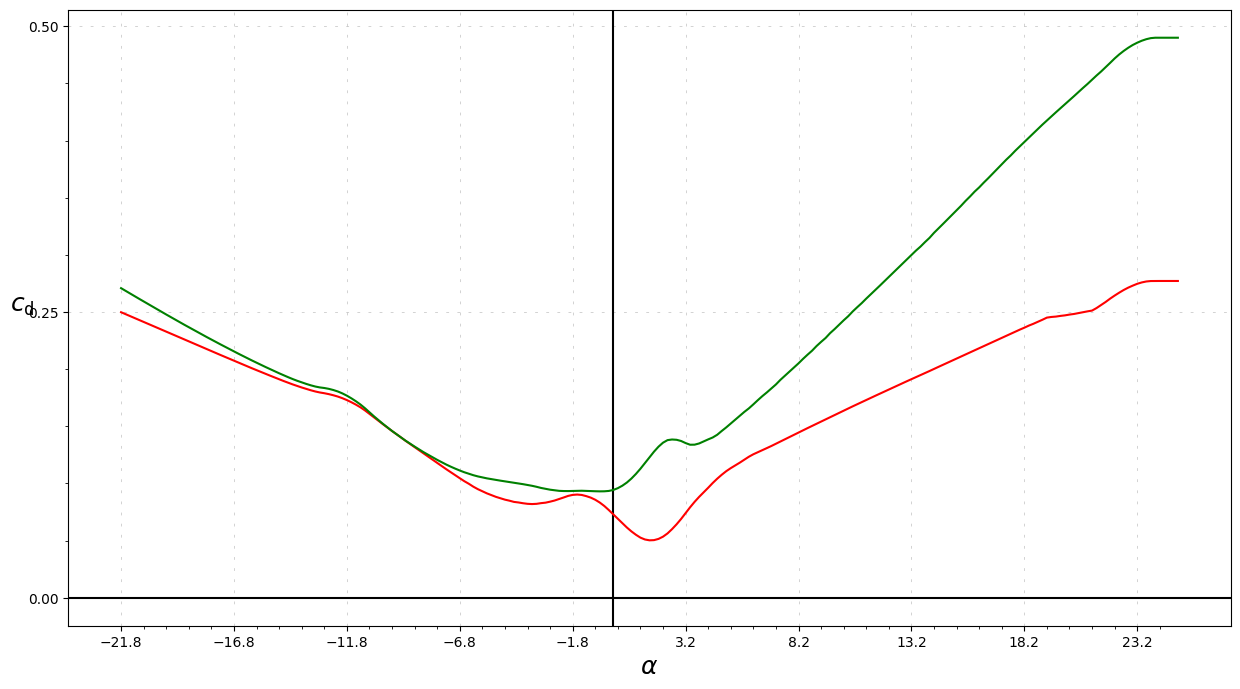

In [72]:
## plot
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}
current_cm = colormap['None']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_{\\mathtt{d}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
ax.set_yticks(np.arange(-0.5,3,0.25))
ax.set_xticks(alpha[0::5],minor=True)
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_xticks(alpha[0::25])
ax.set_facecolor(current_cm['ax_facecolor'])
ax.plot(alpha,cd[:],color='red')
ax.plot(alpha,CD[:],color='green')

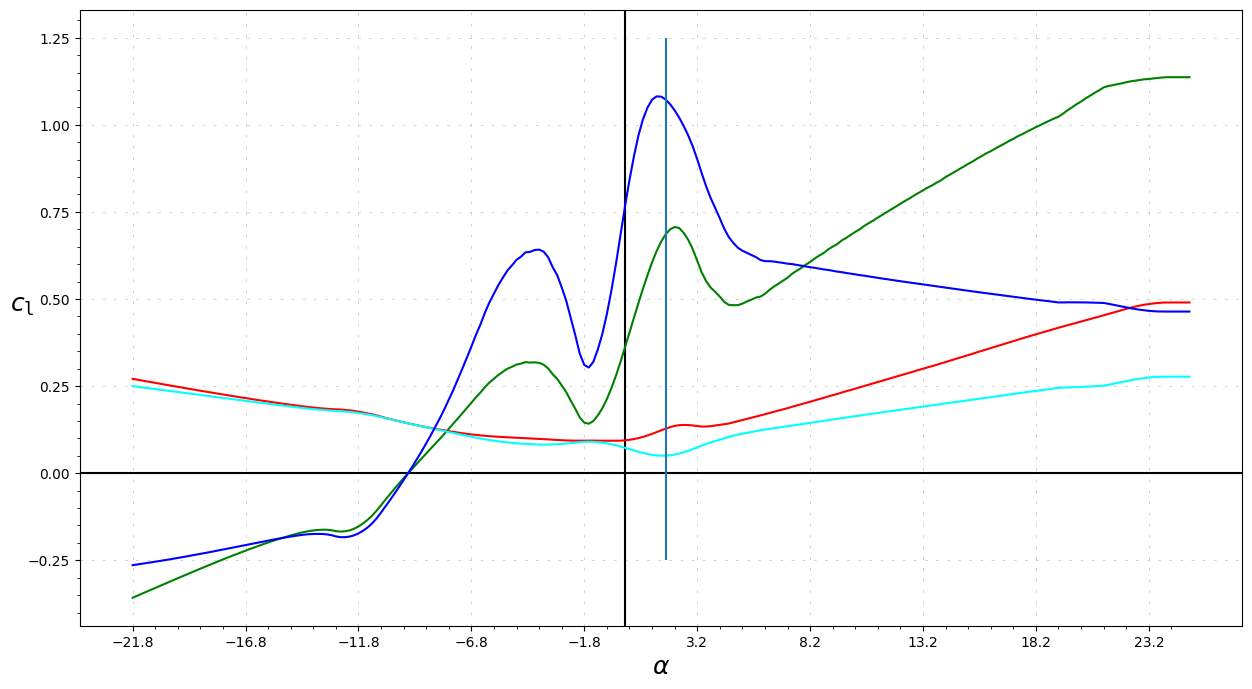

In [105]:
## plot
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}
current_cm = colormap['None']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
ax.set_yticks(np.arange(-0.5,3,0.25))
ax.set_xticks(alpha[0::5],minor=True)
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_xticks(alpha[0::25])
ax.set_facecolor(current_cm['ax_facecolor'])
ax.plot(alpha,CL[:],color='green')
ax.plot(alpha,CD[:],color='red')
ax.plot(alpha,cd[:],color='cyan')
ax.plot(alpha,CL[:]/CD/5,color='blue')
ax.vlines(1.8, ymin=-0.25, ymax=1.25)

0.05039145454545454 1.0435072727272727 1.8


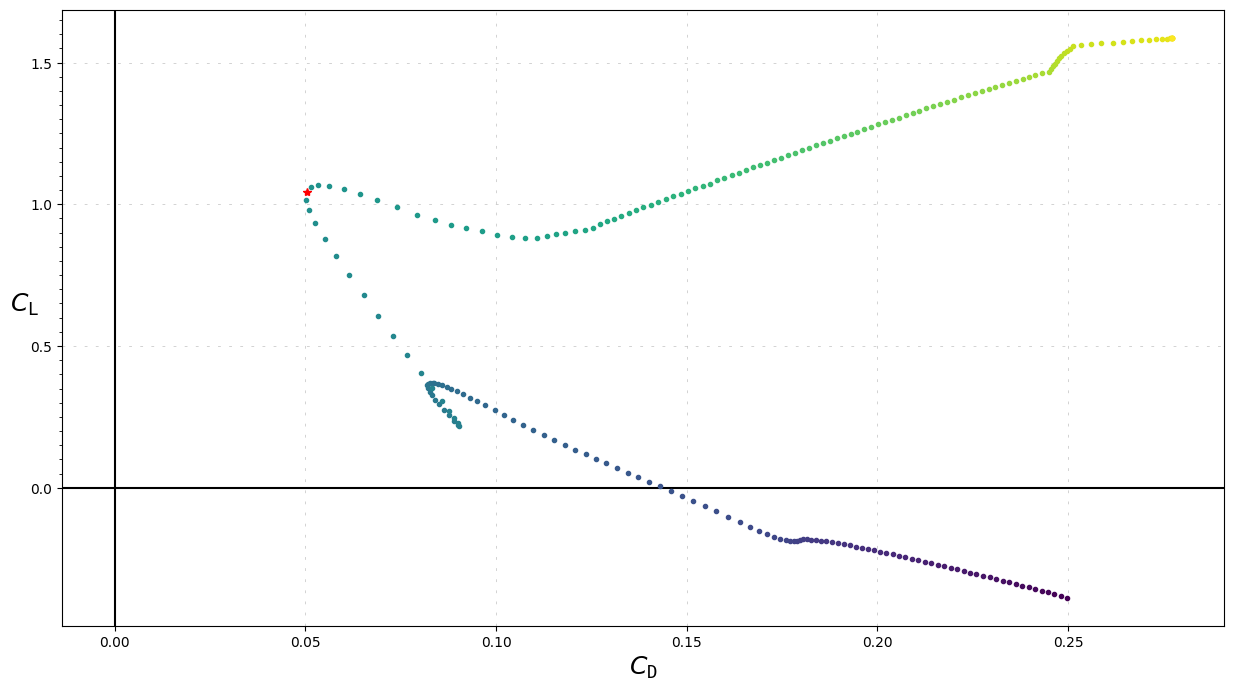

In [95]:
## plot
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}
current_cm = colormap['None']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$C_{\\mathtt{L}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$C_{\\mathtt{D}}$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(0,3,0.05),minor=True)
ax.set_yticks(np.arange(0,3,0.5))
ax.set_xticks(np.arange(0,3,0.05),minor=True)
ax.set_xticks(np.arange(0,3,0.05))
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_facecolor(current_cm['ax_facecolor'])
max_ef = np.argmax(cl/cd)
for i,_ in enumerate(cd):
    if i == max_ef: 
        ax.plot(cd[i],cl[i],'*',color='red')
        print(cd[max_ef],cl[max_ef],alpha[max_ef])
    else: ax.plot(cd[i],cl[i],'.',color=cmap.viridis(i/len(cd)))